
## 1. Random Walks

*https://ko.wikipedia.org/wiki/%EB%AC%B4%EC%9E%91%EC%9C%84_%ED%96%89%EB%B3%B4

(a) 1차원 랜덤워크 모형을 시뮬레이션으로 구현하여라. 구체적으로 1차원 격자에서 왼쪽으로 움직일 확률이 1/2, 오른쪽으로 움직일 확률이 1/2로 가정하자. 그리고 $t$시간이 지난 후에 입자가 존재하는 위치를 구하는 코드를 작성하여라. 초기에 입자는 원점에 존재하며 매 타임스텝마다 1번씩 움직인다. (몬테카를로 시뮬레이션)

[-6]


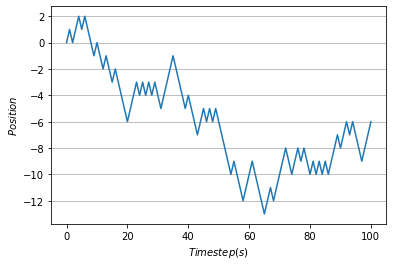

In [78]:
import numpy as np
import matplotlib.pyplot as plt

x = [0]   # 입자가 존재하는 위치
def random_walk_1D(t):
    move = [1, -1]
    probabilities = [0.5, 0.5]
    for i in range(1, t + 1):
        y = np.random.choice(move, 1, p = probabilities)
        x.append(x[i-1] + y)  
    return x


t = 100   # 타임 스텝
T = [i for i in range(t+1)] 

plt.plot(T, random_walk_1D(t))
plt.grid(axis = 'y')
plt.xlabel('$Time step(s)$')
plt.ylabel('$Position$');

print(x[t])

(b) 이러한 시행을 충분히 많이 시행하여서 $t$시간 후에 입자가 특정 위치에 존재하는 확률 분포를 구하여라. (파이썬 기초)


1.0


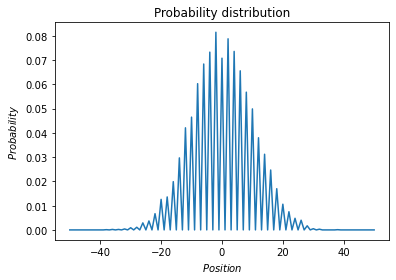

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk_1D(t):
    move = 1, -1
    probabilities = 0.5, 0.5
    x = 0
    for i in range(1, t + 1):
        y = np.random.choice(move)
        x = x + y
    return x

N = 10000 # 랜덤 워크 시행 횟수
t = 100 # 타입 스텝
X = []
for i in range(N):
    i = i+1
    X.append(random_walk_1D(t))

x = np.linspace(-50,50,101)
y = []   # 랜덤워크 최종 위치 분포 값
z = 0
for i in range(-51,50,1):
    i = i+1
    y.append(X.count(i)/N)
    z += X.count(i)/N
    
print(z) # 위치 분포별 확률의 값의 합이 1 이 되는지 확인.
plt.plot(x,y)
plt.title('Probability distribution')
plt.xlabel('$Position$')
plt.ylabel('$Probability$');

  위 그래프는 랜덤워크를 100타임스텝으로 10000번 시행했을 때, 각 위치별 확률 분포를 나타낸 것이다.

  그래프를 보면 지그재그로 된 것을 볼 수 있는데 이는 타임 스텝을 100번, 즉 짝수번 실시하였다. 그렇기 때문에
경우가 +1 -1 = 0 또는 +1 +1 = 2 또는 -1 -1 = -2 로 결국 홀수 위치에 존재할 수 없게 된다. 따라서 위 그래프와 
같이 그래프가 나타나며, 짝수 위치만 있다고 생각해 본다면 위 그래프는 위치가 0일 때 가장 많이 존재할 확률이
높은 것을 확인 할 수 있다.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk_1D(t):
    move = 1, -1
    probabilities = 0.5, 0.5
    x = 0
    for i in range(1, t + 1):
        y = np.random.choice(move, 1, p = probabilities)
        x = x + y
    return x
print(random_walk_1D(50))

[0]



## 2. Bifurcation
다음으로 주어지는 미분방정식이 있다.$$ \frac{dx}{dt}= rx-x^2. $$

#### (a) 이 방정식을 다음의 조건에서 풀고 궤적을 그려라. (미분방정식)

1. r=-1, x(0)=2
2. r=-1, x(0)=-2
3. r=1, x(0)=2
4. r=1, x(0)=-2

In [5]:
from sympy import *

t = symbols('t')
r = symbols('r')
x = Function('x')

#r= -1, x(0)=2
deq = Eq(x(t).diff(t),-1*x(t)-x(t)*x(t))
dsolve1 = dsolve( deq, ics= {x(0):2} )
dsolve1

Eq(x(t), -2/(3*(2/3 - exp(t))))

In [6]:
#r= -1, x(0)=-2
deq = Eq(x(t).diff(t),-1*x(t)-x(t)*x(t))
dsolve2 = dsolve( deq, ics= {x(0):-2} )
dsolve2

Eq(x(t), -2/(2 - exp(t)))

In [7]:
#r= 1, x(0)=-2
deq = Eq(x(t).diff(t),1*x(t)-x(t)*x(t))
dsolve3 = dsolve( deq, ics= {x(0):-2} )
dsolve3

Eq(x(t), 1/(1 - 3*exp(-t)/2))

In [8]:
#r= 1, x(0)=2
deq = Eq(x(t).diff(t),1*x(t)-x(t)*x(t))
dsolve4 = dsolve( deq, ics= {x(0):2} )
dsolve4

Eq(x(t), 1/(1 - exp(-t)/2))

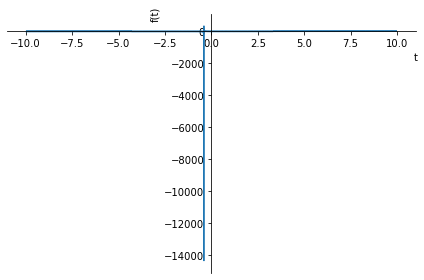

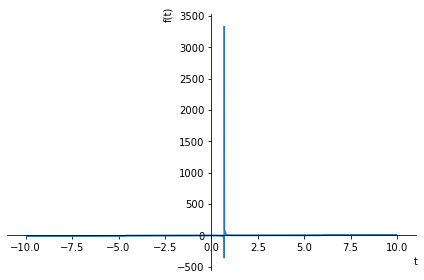

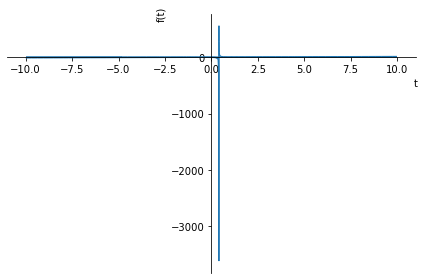

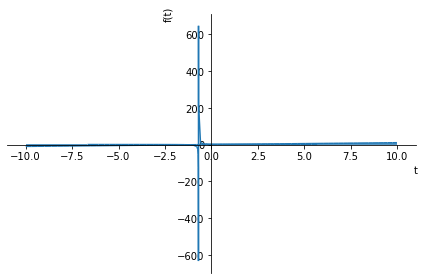

In [9]:
plot( dsolve1.rhs, (t))
plot( dsolve2.rhs, (t))
plot( dsolve3.rhs, (t))
plot( dsolve4.rhs, (t));

#### (b) 정상상태(dx/dt=0)에서 가능한 해를 구하여라. (방정식)

즉, 다음의 조건에서 파이썬을 이용하여 방정식을 풀어라.$$ 0= rx -x^2 = x( r-x) $$

1. r  =  -1
 
 방정식의 해는 두가지 : x = 0 or r - x = 0 
                                 x = -1

In [10]:
# r = -1, x(0) = 0

deq = Eq(x(t).diff(t),-1*x(t)-x(t)*x(t))
dsolve5 = dsolve( deq, ics= {x(0):0} )
dsolve5

Eq(x(t), 0)

In [11]:
# r = -1, x(0) = -1

deq = Eq(x(t).diff(t),-1*x(t)-x(t)*x(t))
dsolve6 = dsolve( deq, ics= {x(0):-1} )
dsolve6

ValueError: Couldn't solve for initial conditions

r = -1, x(0) = -1 일 때 해는 존재하지 않는다.

2. r = 1
  
   방정식의 해는 두가지 : x = 0 or r - x = 0
                                   x = 1

In [12]:
# r = 1, x(0) = 0

deq = Eq(x(t).diff(t),1*x(t)-x(t)*x(t))
dsolve7 = dsolve( deq, ics= {x(0):0} )
dsolve7

ValueError: Couldn't solve for initial conditions

r = 1, x(0) = 0 일 때 해는 존재하지 않는다.

In [13]:
# r = 1, x(0) = 1

deq = Eq(x(t).diff(t),1*x(t)-x(t)*x(t))
dsolve8 = dsolve( deq, ics= {x(0):1} )
dsolve8

Eq(x(t), 1)